In [4]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt


data_dir = '/Users/pranjalmishra/SCAI/ECG_data/user_001'

# List all files in the data directory
files = os.listdir(data_dir)


# Dictionary to store DataFrames
data_frames = {}

# Load each CSV file into a DataFrame
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(data_dir, file)
        data_frames[file] = pd.read_csv(file_path)
    

# Example: Print the first few rows of each DataFrame
for file, df in data_frames.items():
    print(f"\nData from {file}:")
    print(df.head())



Data from rr19to21Feb.csv:
         date  minute  value
0  19.02.2022      60  18.10
1  19.02.2022      61  18.20
2  19.02.2022      62  16.50
3  19.02.2022      63  18.25
4  19.02.2022      64  18.80

Data from hr19to21Feb2022.csv:
         date  minute  value
0  19.02.2022      60   65.0
1  19.02.2022      61   65.0
2  19.02.2022      62   69.0
3  19.02.2022      63   67.0
4  19.02.2022      64   69.0

Data from rr19to21Feb (1).csv:
         date  minute  value
0  19.02.2022      60  18.10
1  19.02.2022      61  18.20
2  19.02.2022      62  16.50
3  19.02.2022      63  18.25
4  19.02.2022      64  18.80

Data from ecg_22Feb2022_1500hour.csv:
       Second  ECG value in uV
0  665.793000           -0.004
1  665.800812           -0.005
2  665.808625            0.001
3  665.816437            0.027
4  665.824250            0.025


In [5]:

# Load the data from the provided CSV file
file_path = 'ECG_data/user_001/rr19to21Feb.csv'
ecg_data = pd.read_csv(file_path)

# Plot the ECG data
plt.figure(figsize=(12, 6))
plt.plot(ecg_data['Second'], ecg_data['ECG value in uV'], label='ECG Value (uV)')
plt.title('ECG Data')
plt.xlabel('Time (Seconds)')
plt.ylabel('ECG Value (uV)')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Second'

<Figure size 1200x600 with 0 Axes>

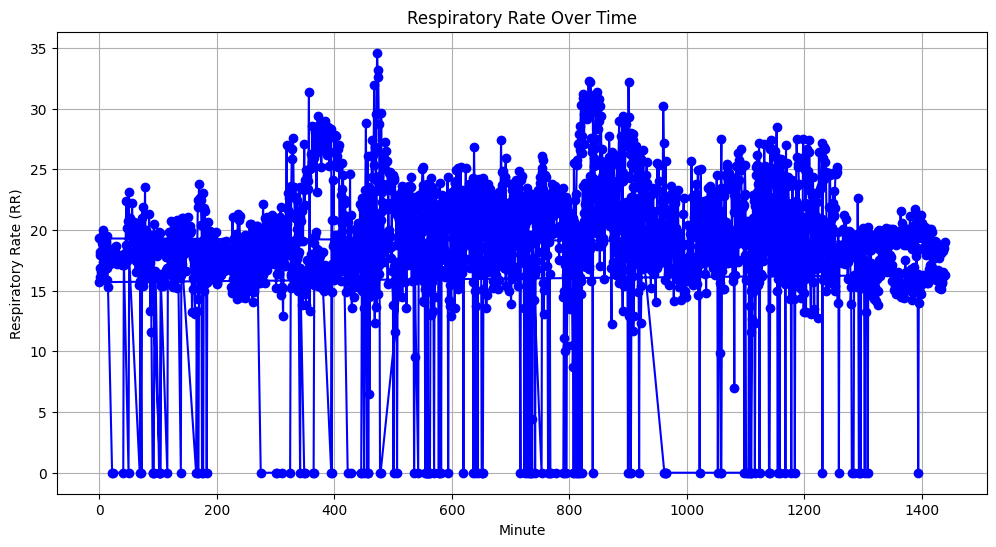

In [ ]:
# Load the data from the provided CSV file
file_path = 'ECG_data/user_001/rr19to21Feb.csv'
rr_data = pd.read_csv(file_path)

# Plot the ECG data
# Plot the RR data
plt.figure(figsize=(12, 6))
plt.plot(rr_data['minute'], rr_data['value'], marker='o', linestyle='-', color='b')
plt.title('Respiratory Rate Over Time')
plt.xlabel('Minute')
plt.ylabel('Respiratory Rate (RR)')
plt.grid(True)
plt.show()

In [20]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# Load ECG data from CSV
ecg_data = pd.read_csv('ECG_data/user_001/ecg_22Feb2022_1500hour.csv', header=None, skiprows=1)
ecg_time = ecg_data[0].values[:1000]  # First column is time in ms
ecg_signal = ecg_data[1].values[:1000]  # Second column is ECG signal in µV

# Calculate the differences between consecutive timestamps
time_diff = np.diff(ecg_time)

# Compute the average time difference
avg_time_diff = np.mean(time_diff)

# Determine the sampling frequency
fs = 1 / avg_time_diff

# Display the calculated sampling frequency
print(f"Calculated Sampling Frequency: {fs:.2f} Hz") # Sampling frequency in Hz




Calculated Sampling Frequency: 128.00 Hz


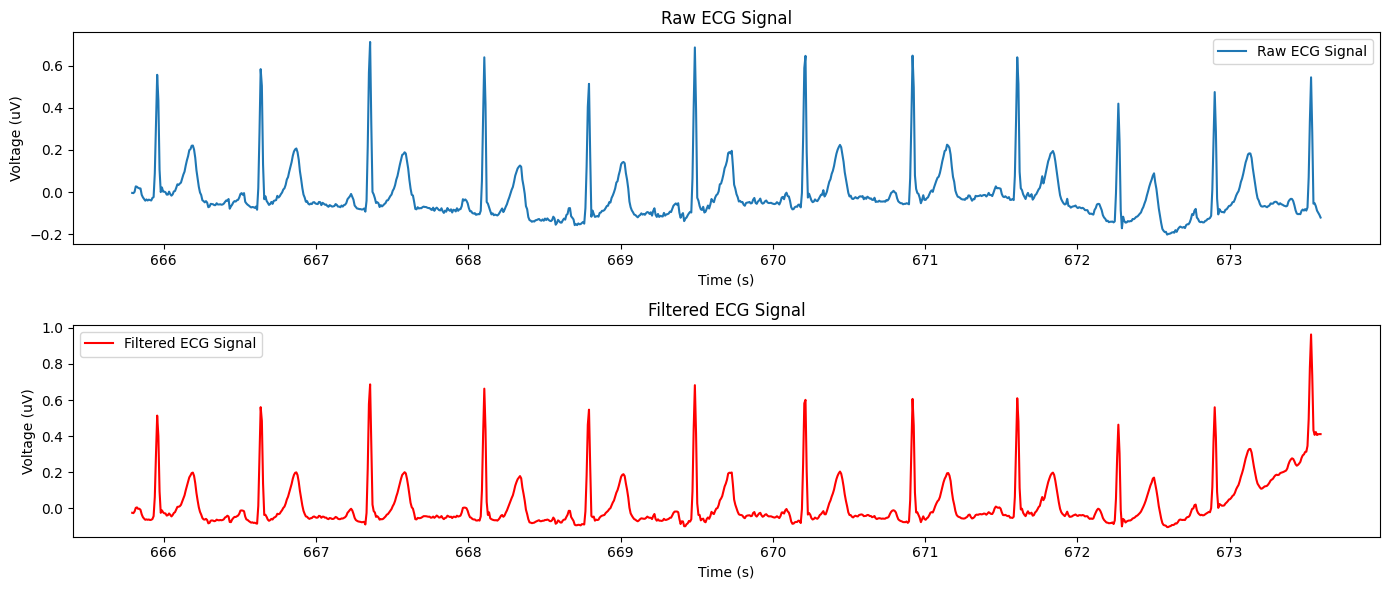

In [21]:
# Preprocessing: Band-pass filter
lowcut = 0.5
highcut = 50.0
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(1, [low, high], btype='band')
filtered_ecg = signal.filtfilt(b, a, ecg_signal)

# Plot the raw and filtered ECG signals
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(ecg_time, ecg_signal, label='Raw ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('Raw ECG Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ecg_time, filtered_ecg, label='Filtered ECG Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('Filtered ECG Signal')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

In [36]:
def ecg(path):
    # Load ECG data from csv
    ecg_data = pd.read_csv(path, header=None, skiprows=1)

    # Extract time and voltage data
    timeECG = ecg_data[0].values
    waveData = ecg_data[1].values

    return timeECG, waveData

datapath = 'ECG_data/user_001/ecg_22Feb2022_1500hour.csv'
timeECG, waveData = ecg(datapath)


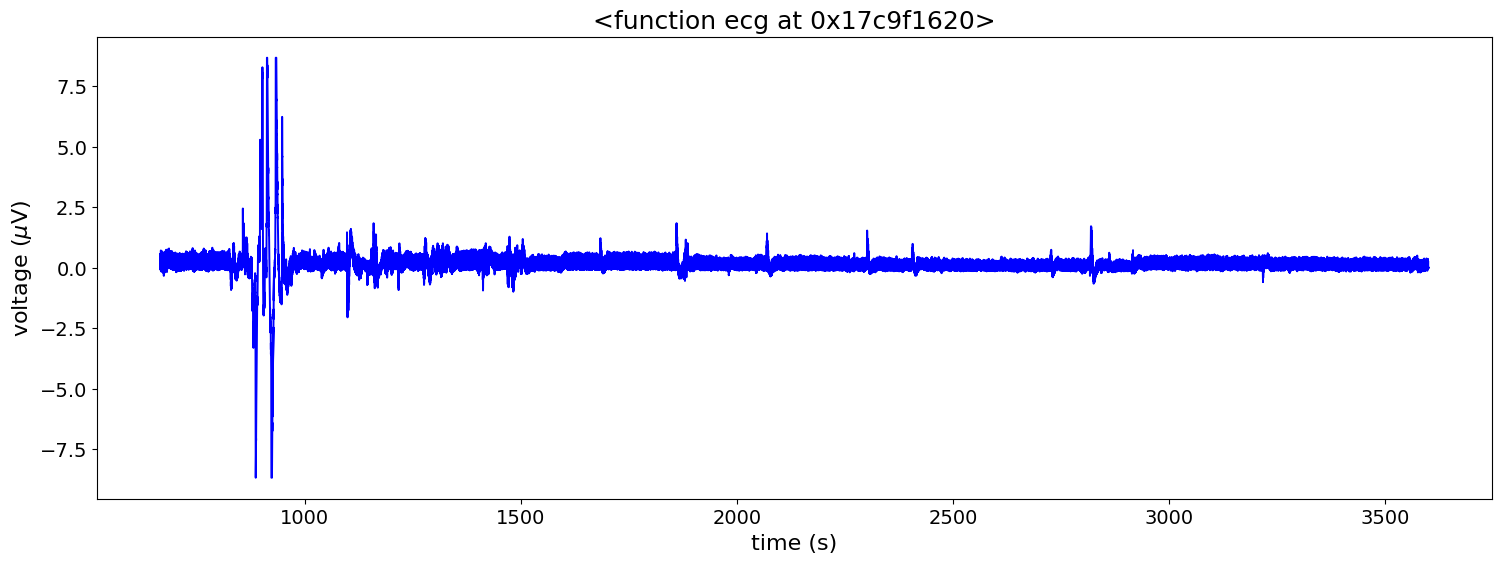

In [37]:
timeECG, waveData = ecg(datapath)
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.title(ecg)
plt.show()

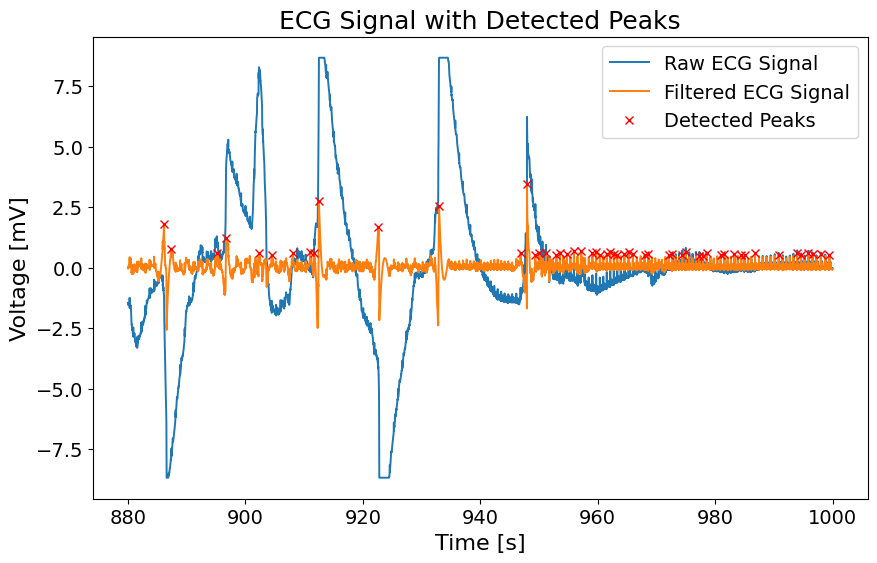

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

class ECG:
    def __init__(self, path, lowcut=0.5, highcut=50):
        self.path = path
        self.lowcut = lowcut
        self.highcut = highcut
        self.timeECG, self.waveData = self.load_ecg()
        self.fs = self.compute_sampling_frequency()
        self.filtered_waveData = None
        self.peaks = None
        self.properties = None

    def load_ecg(self):
        """Load ECG data from csv file."""
        ecg_data = pd.read_csv(self.path, header=None, skiprows=1)
        timeECG = ecg_data[0].values
        waveData = ecg_data[1].values
        return timeECG, waveData

    def compute_sampling_frequency(self):
        """Compute the sampling frequency from time data."""
        time_diff = np.diff(self.timeECG)
        avg_time_diff = np.mean(time_diff)
        fs = 1 / avg_time_diff
        return fs

    def bandpass_filter(self, data):
        """Apply bandpass filter to ECG data."""
        nyquist = 0.5 * self.fs
        low = self.lowcut / nyquist
        high = self.highcut / nyquist
        b, a = butter(4, [low, high], btype='band')
        y = filtfilt(b, a, data)
        return y

    def find_peaks(self, height=0.5, distance=None):
        """Find peaks in the ECG signal."""
        if distance is None:
            distance = self.fs / 2.5  # Default distance between peaks; adjust as needed

        self.filtered_waveData = self.bandpass_filter(self.waveData)
        self.peaks, self.properties = find_peaks(self.filtered_waveData, height=height, distance=distance)
        return self.peaks, self.properties

    def plot(self, start_time=None, end_time=None):
        """Plot the raw and filtered ECG data with detected peaks."""
        if self.peaks is None or self.filtered_waveData is None:
            raise ValueError("Peaks and filtered data are not available. Run find_peaks() first.")

        if start_time is None:
            start_time = self.timeECG[0]
        if end_time is None:
            end_time = self.timeECG[-1]

        # Find indices for the specified time range
        start_idx = np.searchsorted(self.timeECG, start_time)
        end_idx = np.searchsorted(self.timeECG, end_time)

        # Plot the data within the specified time range
        plt.figure(figsize=(10, 6))
        plt.plot(self.timeECG[start_idx:end_idx], self.waveData[start_idx:end_idx], label='Raw ECG Signal')
        plt.plot(self.timeECG[start_idx:end_idx], self.filtered_waveData[start_idx:end_idx], label='Filtered ECG Signal')
        
        # Plot the detected peaks within the specified time range
        peaks_in_range = (self.peaks >= start_idx) & (self.peaks < end_idx)
        plt.plot(self.timeECG[self.peaks[peaks_in_range]], self.filtered_waveData[self.peaks[peaks_in_range]], 'rx', label='Detected Peaks')
        
        plt.title('ECG Signal with Detected Peaks')
        plt.xlabel('Time [s]')
        plt.ylabel('Voltage [mV]')
        plt.legend()
        plt.show()

# Example usage
datapath = 'ECG_data/user_001/ecg_22Feb2022_1500hour.csv'
ecg_instance = ECG(datapath)

# Find peaks
ecg_instance.find_peaks()

# Plot the results within a specified time range
start_time = 880  # Start time in seconds
end_time = 1000    # End time in seconds
ecg_instance.plot(start_time=start_time, end_time=end_time)


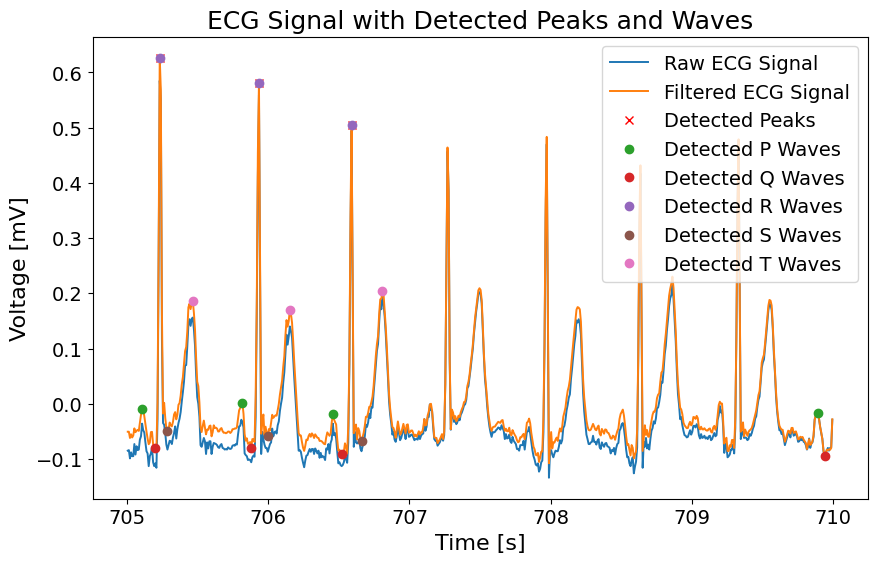

PR Intervals: [0.1328125 0.1328125 0.125     0.1328125 0.125     0.1171875 0.125
 0.125     0.140625  0.125     0.125     0.1171875 0.125     0.125
 0.125     0.125     0.125     0.125     0.125     0.1171875 0.125
 0.125     0.125     0.140625  0.1171875 0.125     0.125     0.1171875
 0.1171875 0.1328125 0.1171875 0.1171875 0.125     0.1171875 0.125
 0.125     0.1328125 0.1171875 0.125     0.1171875 0.1328125 0.125
 0.125     0.1171875 0.1328125 0.125     0.1171875 0.1328125 0.125
 0.125     0.1171875 0.125     0.125     0.125     0.1171875 0.125
 0.125     0.125     0.125     0.1171875 0.1171875 0.125     0.1171875
 0.1328125 0.1171875 0.125     0.1328125 0.1328125 0.125     0.1328125
 0.1328125 0.1171875 0.125     0.1328125 0.125     0.125     0.1171875
 0.1328125 0.1171875 0.125     0.125     0.1171875 0.1328125 0.125
 0.1328125 0.1171875 0.125     0.125     0.125     0.125     0.1171875
 0.125     0.1328125 0.125     0.1171875 0.1171875 0.125     0.1171875
 0.1328125 0.1171875 0.1

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

class ECG:
    def __init__(self, path, lowcut=0.5, highcut=50):
        self.path = path
        self.lowcut = lowcut
        self.highcut = highcut
        self.timeECG, self.waveData = self.load_ecg()
        self.fs = self.compute_sampling_frequency()
        self.filtered_waveData = None
        self.peaks = None
        self.properties = None
        self.wave_points = {}

    def load_ecg(self):
        """Load ECG data from csv file."""
        ecg_data = pd.read_csv(self.path, header=None, skiprows=1)
        timeECG = ecg_data[0].values
        waveData = ecg_data[1].values
        return timeECG, waveData

    def compute_sampling_frequency(self):
        """Compute the sampling frequency from time data."""
        time_diff = np.diff(self.timeECG)
        avg_time_diff = np.mean(time_diff)
        fs = 1 / avg_time_diff
        return fs

    def bandpass_filter(self, data):
        """Apply bandpass filter to ECG data."""
        nyquist = 0.5 * self.fs
        low = self.lowcut / nyquist
        high = self.highcut / nyquist
        b, a = butter(4, [low, high], btype='band')
        y = filtfilt(b, a, data)
        return y

    def find_peaks(self, height=0.5, distance=None):
        """Find peaks in the ECG signal."""
        if distance is None:
            distance = self.fs / 2.5  # Default distance between peaks; adjust as needed

        self.filtered_waveData = self.bandpass_filter(self.waveData)
        self.peaks, self.properties = find_peaks(self.filtered_waveData, height=height, distance=distance)
        return self.peaks, self.properties

    def detect_wave_points(self):
        """Detect P, Q, R, S, T wave points."""
        if self.peaks is None:
            raise ValueError("R peaks are not detected. Run find_peaks() first.")

        self.wave_points = {'P': [], 'Q': [], 'R': [], 'S': [], 'T': []}

        for r_idx in self.peaks:
            # Detect Q wave (minimum before R peak)
            q_search_start = max(0, r_idx - int(0.1 * self.fs))  # Search 100 ms before R peak
            q_idx = q_search_start + np.argmin(self.filtered_waveData[q_search_start:r_idx])
            
            # Detect S wave (minimum after R peak)
            s_search_end = min(len(self.filtered_waveData), r_idx + int(0.1 * self.fs))  # Search 100 ms after R peak
            s_idx = r_idx + np.argmin(self.filtered_waveData[r_idx:s_search_end])
            
            # Detect P wave (maximum before Q wave)
            p_search_start = max(0, q_idx - int(0.2 * self.fs))  # Search 200 ms before Q wave
            p_idx = p_search_start + np.argmax(self.filtered_waveData[p_search_start:q_idx])
            
            # Detect T wave (maximum after S wave)
            t_search_end = min(len(self.filtered_waveData), s_idx + int(0.4 * self.fs))  # Search 400 ms after S wave
            t_idx = s_idx + np.argmax(self.filtered_waveData[s_idx:t_search_end])
            
            self.wave_points['P'].append(p_idx)
            self.wave_points['Q'].append(q_idx)
            self.wave_points['R'].append(r_idx)
            self.wave_points['S'].append(s_idx)
            self.wave_points['T'].append(t_idx)
        
        return self.wave_points

    def plot(self, start_time=None, end_time=None):
        """Plot the raw and filtered ECG data with detected peaks."""
        if self.peaks is None or self.filtered_waveData is None:
            raise ValueError("Peaks and filtered data are not available. Run find_peaks() first.")

        if start_time is None:
            start_time = self.timeECG[0]
        if end_time is None:
            end_time = self.timeECG[-1]

        # Find indices for the specified time range
        start_idx = np.searchsorted(self.timeECG, start_time)
        end_idx = np.searchsorted(self.timeECG, end_time)

        # Plot the data within the specified time range
        plt.figure(figsize=(10, 6))
        plt.plot(self.timeECG[start_idx:end_idx], self.waveData[start_idx:end_idx], label='Raw ECG Signal')
        plt.plot(self.timeECG[start_idx:end_idx], self.filtered_waveData[start_idx:end_idx], label='Filtered ECG Signal')
        
        # Plot the detected peaks within the specified time range
        peaks_in_range = (self.peaks >= start_idx) & (self.peaks < end_idx)
        plt.plot(self.timeECG[self.peaks[peaks_in_range]], self.filtered_waveData[self.peaks[peaks_in_range]], 'rx', label='Detected Peaks')

        # Plot the detected wave points
        for wave, indices in self.wave_points.items():
            indices_in_range = (np.array(indices) >= start_idx) & (np.array(indices) < end_idx)
            plt.plot(self.timeECG[np.array(indices)[indices_in_range]], self.filtered_waveData[np.array(indices)[indices_in_range]], 'o', label=f'Detected {wave} Waves')
        
        plt.title('ECG Signal with Detected Peaks and Waves')
        plt.xlabel('Time [s]')
        plt.ylabel('Voltage [mV]')
        plt.legend()
        plt.show()

    def calculate_intervals(self):
        """Calculate PR, QRS, and QT intervals."""
        if not self.wave_points:
            raise ValueError("Wave points are not detected. Run detect_wave_points() first.")

        pr_intervals = (np.array(self.wave_points['R']) - np.array(self.wave_points['P'])) / self.fs
        qrs_intervals = (np.array(self.wave_points['S']) - np.array(self.wave_points['Q'])) / self.fs
        qt_intervals = (np.array(self.wave_points['T']) - np.array(self.wave_points['Q'])) / self.fs
        
        return pr_intervals, qrs_intervals, qt_intervals

# Example usage
datapath = 'ECG_data/user_001/ecg_22Feb2022_1500hour.csv'
ecg_instance = ECG(datapath)

# Find peaks
ecg_instance.find_peaks()

# Detect P, Q, R, S, T wave points
ecg_instance.detect_wave_points()

# Plot the results within a specified time range
start_time = 705  # Start time in seconds
end_time = 710    # End time in seconds
ecg_instance.plot(start_time=start_time, end_time=end_time)

# Calculate PR, QRS, and QT intervals
pr_intervals, qrs_intervals, qt_intervals = ecg_instance.calculate_intervals()
print("PR Intervals:", pr_intervals)
print("QRS Intervals:", qrs_intervals)
print("QT Intervals:", qt_intervals)


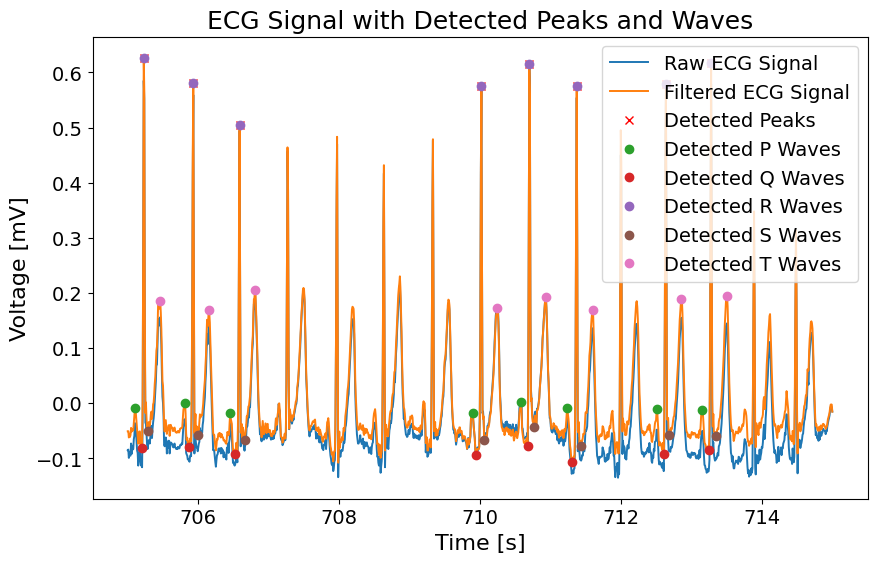

PR Intervals: [0.125     0.1171875 0.1328125 0.125     0.1171875 0.1328125 0.125
 0.125    ]
QRS Intervals: [0.0859375 0.1171875 0.140625  0.1171875 0.0859375 0.1328125 0.0703125
 0.09375  ]
QT Intervals: [0.265625  0.2734375 0.2890625 0.3046875 0.2578125 0.296875  0.25
 0.25     ]


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

class ECG:
    def __init__(self, path, lowcut=0.5, highcut=50):
        self.path = path
        self.lowcut = lowcut
        self.highcut = highcut
        self.timeECG, self.waveData = self.load_ecg()
        self.fs = self.compute_sampling_frequency()
        self.filtered_waveData = None
        self.peaks = None
        self.properties = None
        self.wave_points = {}

    def load_ecg(self):
        """Load ECG data from csv file."""
        ecg_data = pd.read_csv(self.path, header=None, skiprows=1)
        timeECG = ecg_data[0].values
        waveData = ecg_data[1].values
        return timeECG, waveData

    def compute_sampling_frequency(self):
        """Compute the sampling frequency from time data."""
        time_diff = np.diff(self.timeECG)
        avg_time_diff = np.mean(time_diff)
        fs = 1 / avg_time_diff
        return fs

    def bandpass_filter(self, data):
        """Apply bandpass filter to ECG data."""
        nyquist = 0.5 * self.fs
        low = self.lowcut / nyquist
        high = self.highcut / nyquist
        b, a = butter(4, [low, high], btype='band')
        y = filtfilt(b, a, data)
        return y

    def find_peaks(self, height=0.5, distance=None):
        """Find peaks in the ECG signal."""
        if distance is None:
            distance = self.fs / 2.5  # Default distance between peaks; adjust as needed

        self.filtered_waveData = self.bandpass_filter(self.waveData)
        self.peaks, self.properties = find_peaks(self.filtered_waveData, height=height, distance=distance)
        return self.peaks, self.properties

    def detect_wave_points(self):
        """Detect P, Q, R, S, T wave points."""
        if self.peaks is None:
            raise ValueError("R peaks are not detected. Run find_peaks() first.")

        self.wave_points = {'P': [], 'Q': [], 'R': [], 'S': [], 'T': []}

        for r_idx in self.peaks:
            # Detect Q wave (minimum before R peak)
            q_search_start = max(0, r_idx - int(0.1 * self.fs))  # Search 100 ms before R peak
            q_idx = q_search_start + np.argmin(self.filtered_waveData[q_search_start:r_idx])
            
            # Detect S wave (minimum after R peak)
            s_search_end = min(len(self.filtered_waveData), r_idx + int(0.1 * self.fs))  # Search 100 ms after R peak
            s_idx = r_idx + np.argmin(self.filtered_waveData[r_idx:s_search_end])
            
            # Detect P wave (maximum before Q wave)
            p_search_start = max(0, q_idx - int(0.2 * self.fs))  # Search 200 ms before Q wave
            p_idx = p_search_start + np.argmax(self.filtered_waveData[p_search_start:q_idx])
            
            # Detect T wave (maximum after S wave)
            t_search_end = min(len(self.filtered_waveData), s_idx + int(0.4 * self.fs))  # Search 400 ms after S wave
            t_idx = s_idx + np.argmax(self.filtered_waveData[s_idx:t_search_end])
            
            self.wave_points['P'].append(p_idx)
            self.wave_points['Q'].append(q_idx)
            self.wave_points['R'].append(r_idx)
            self.wave_points['S'].append(s_idx)
            self.wave_points['T'].append(t_idx)
        
        return self.wave_points

    def plot(self, start_time=None, end_time=None):
        """Plot the raw and filtered ECG data with detected peaks."""
        if self.peaks is None or self.filtered_waveData is None:
            raise ValueError("Peaks and filtered data are not available. Run find_peaks() first.")

        if start_time is None:
            start_time = self.timeECG[0]
        if end_time is None:
            end_time = self.timeECG[-1]

        # Find indices for the specified time range
        start_idx = np.searchsorted(self.timeECG, start_time)
        end_idx = np.searchsorted(self.timeECG, end_time)

        # Plot the data within the specified time range
        plt.figure(figsize=(10, 6))
        plt.plot(self.timeECG[start_idx:end_idx], self.waveData[start_idx:end_idx], label='Raw ECG Signal')
        plt.plot(self.timeECG[start_idx:end_idx], self.filtered_waveData[start_idx:end_idx], label='Filtered ECG Signal')
        
        # Plot the detected peaks within the specified time range
        peaks_in_range = (self.peaks >= start_idx) & (self.peaks < end_idx)
        plt.plot(self.timeECG[self.peaks[peaks_in_range]], self.filtered_waveData[self.peaks[peaks_in_range]], 'rx', label='Detected Peaks')

        # Plot the detected wave points
        for wave, indices in self.wave_points.items():
            indices_in_range = (np.array(indices) >= start_idx) & (np.array(indices) < end_idx)
            plt.plot(self.timeECG[np.array(indices)[indices_in_range]], self.filtered_waveData[np.array(indices)[indices_in_range]], 'o', label=f'Detected {wave} Waves')
        
        plt.title('ECG Signal with Detected Peaks and Waves')
        plt.xlabel('Time [s]')
        plt.ylabel('Voltage [mV]')
        plt.legend()
        plt.show()

    def calculate_intervals(self, start_time=None, end_time=None):
        """Calculate PR, QRS, and QT intervals for a specified time range."""
        if not self.wave_points:
            raise ValueError("Wave points are not detected. Run detect_wave_points() first.")

        if start_time is None:
            start_time = self.timeECG[0]
        if end_time is None:
            end_time = self.timeECG[-1]

        # Find indices for the specified time range
        start_idx = np.searchsorted(self.timeECG, start_time)
        end_idx = np.searchsorted(self.timeECG, end_time)

        # Filter wave points within the specified time range
        wave_points_in_range = {wave: [] for wave in self.wave_points}
        for wave, indices in self.wave_points.items():
            indices_in_range = [idx for idx in indices if start_idx <= idx < end_idx]
            wave_points_in_range[wave] = indices_in_range

        # Calculate intervals within the specified time range
        pr_intervals = (np.array(wave_points_in_range['R']) - np.array(wave_points_in_range['P'])) / self.fs
        qrs_intervals = (np.array(wave_points_in_range['S']) - np.array(wave_points_in_range['Q'])) / self.fs
        qt_intervals = (np.array(wave_points_in_range['T']) - np.array(wave_points_in_range['Q'])) / self.fs
        
        return pr_intervals, qrs_intervals, qt_intervals

# Example usage
datapath = 'ECG_data/user_001/ecg_22Feb2022_1500hour.csv'
ecg_instance = ECG(datapath)

# Find peaks
ecg_instance.find_peaks()

# Detect P, Q, R, S, T wave points
ecg_instance.detect_wave_points()

# Plot the results within a specified time range
start_time = 705  # Start time in seconds
end_time = 715    # End time in seconds
ecg_instance.plot(start_time=start_time, end_time=end_time)

# Calculate PR, QRS, and QT intervals within the specified time range
pr_intervals, qrs_intervals, qt_intervals = ecg_instance.calculate_intervals(start_time=start_time, end_time=end_time)
print("PR Intervals:", pr_intervals)
print("QRS Intervals:", qrs_intervals)
print("QT Intervals:", qt_intervals)
